
# Experiment 2:	Implementation of Multi-Layer Perceptron


### **1. Objective**
WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.   


### **2. Description of the Model**
For this experiment,an MLP is designed with one hidden layer to solve the XOR function, which is a non-linearly separable problem. Since a single-layer perceptron cannot solve XOR, there is need to introduce hidden layer with multiple neurons .

**Model Components**

**Input Layer**: 2 neurons (for two input bits)

**Hidden Layer**: 4 perceptrons (to learn intermediate patterns)

**Activation Function**: Step function (binary output)

**Output Layer**: 1 perceptron (final XOR output)

### **3. Python Implementation**

Perceptron Class

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.weights = np.random.randn(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def train(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias column
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.activation(np.dot(self.weights, X[i]))
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]

    def predict(self, X, y):
        y_pred = []
        for x in X:
            x_with_bias = np.insert(x, 0, 1)  # Add bias term
            prediction = self.activation(np.dot(self.weights, x_with_bias))
            y_pred.append(prediction)
        return y_pred


Creating the Hidden Layer

In [ ]:
# Define functions dynamically
Hidden_ly_output = [
    np.array([0, 0, 0, 1]),
    np.array([0, 0, 1, 0]),
    np.array([0, 1, 0, 0]),
    np.array([1, 0, 0, 0])
]

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = []

# Train perceptrons for each function dynamically i.e 4 neurons for 4 different inputs
for y in Hidden_ly_output:
    perceptron = Perceptron(input_size=2,epochs=15)
    perceptron.train(X, y)
    y_pred = perceptron.predict(X, y)
    predictions.append(y_pred)



Creating the Final Output Perceptron

In [ ]:
# Convert predictions into input for final perceptron
final_X = np.array(predictions)

final_y = np.array([0, 1, 1, 0]) # XOR output

# Train final perceptron
final_perceptron = Perceptron(input_size=len(final_X),epochs=15)
final_perceptron.train(final_X, final_y)
final_predictions = final_perceptron.predict(final_X, final_y)

# Display XOR truth table with predictions
print("\nXOR Truth Table Predictions:")
print(" X1  X2 |  y_actual  y_pred")
print("---------------------------")
for i in range(len(X)):
    print(f" {X[i][0]}   {X[i][1]}  |     {final_y[i]}        {final_predictions[i]}")



XOR Truth Table Predictions:
 X1  X2 |  y_actual  y_pred
---------------------------
 0   0  |     0        0
 0   1  |     1        1
 1   0  |     1        1
 1   1  |     0        0



### **4. Description of Code**

1.   Perceptron Class:

        *   Implements a simple perceptron with step activation function.
        *   Performs forward propagation and weight updates using the perceptron learning rule.


2.   Hidden Layer Training:

        *   Trains 4 separate perceptrons to learn intermediate patterns for XOR.


3.  Final Output Layer Training:

      *   Uses the outputs from the hidden layer as inputs to a final perceptron.

      *   This final perceptron learns the XOR function.




### **5.Evaluation**

Final Perceptron Accuracy: 100.00%



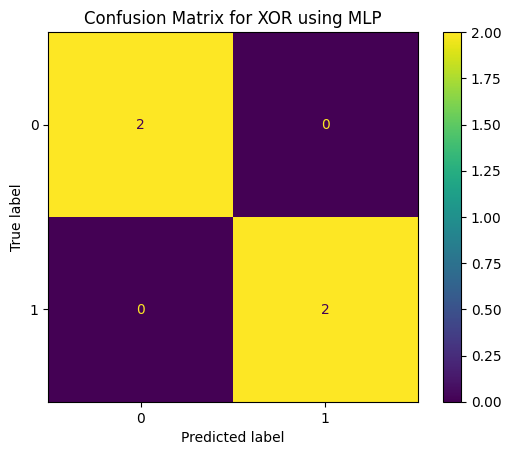

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


accuracy = accuracy_score(final_y, final_predictions)
print(f"Final Perceptron Accuracy: {accuracy * 100:.2f}%")
print()

cm = confusion_matrix(final_y, final_predictions)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix for XOR using MLP")
plt.show()
print()



Accuracy :
- 100% accuracy shows that the perceptron has perfectly learned and classified the XOR logic gate.

Confusion Matrix:
- Shows correct classifications for XOR, provding MLP learns nonlinear functions.

### **6. Comments**
- **Limitations:**
  *    A manually designed 4-perceptron hidden layer works for XOR but might need tuning for different problems or sometimes it may not work for complex problem.
  *   Training takes longer than single-layer perceptron requires.


- **Scope for Improvement:**

  *   Use of feedforward and backward propagation can more easily solve the XOR without explicitly training the hidden layer
  *   Using a Sigmoid Activation Function: Instead of a step function allows smoother weight updates.



### 6. Comments
- **Limitations:**
  *   Training takes longer than single-layer perceptron requires.
  *  Requires more computational power.


- **Scope for Improvement:**

  *   Can add more hidden layers for complex problems to improve accuracy.

  *   Use batch training instead of updating after each sample.

